# ML 분반 Week6 (SVM & DT) 과제
## 제출자: 최주희

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR

- SVC (Classification)
- SVR (Regression)

# Hard Margin Classifier

### Q1. Hard Margin Classifier란? :

데이터 분류에 있어서 예외를 허용하지 않는 분류기가 Hard Margin Classifier이다.

In [2]:
# 데이터셋 생성
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

In [17]:
X[:,1]

array([2, 3, 3, 6, 8, 8])

### Q2. 위 데이터셋을 2차원의 좌표평면에 시각화해주세요.

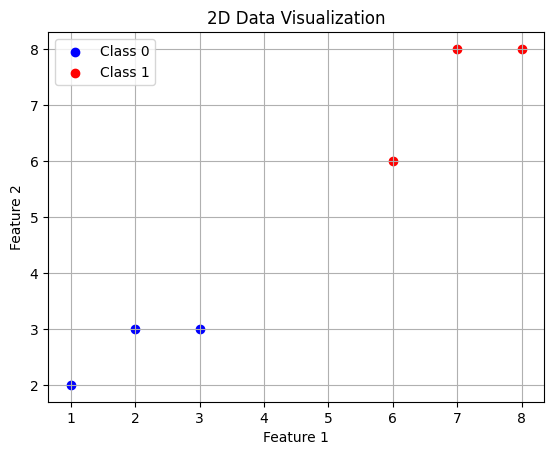

In [10]:
y.shape

(6,)

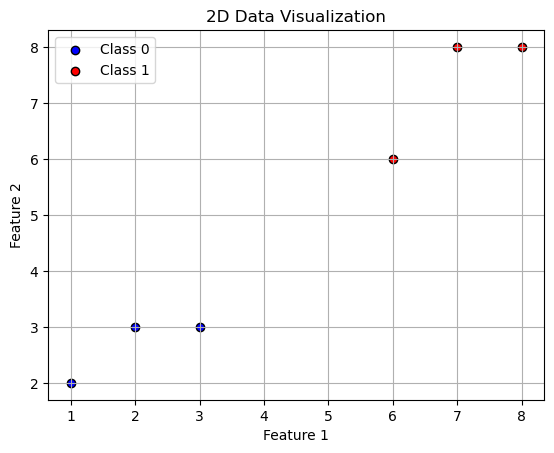

In [53]:
plt.title('2D Data Visualization')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', edgecolors='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()

In [38]:
# Hard Margin SVM 모델 학습
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Q3. 하단 w와 b는 모델 학습으로 찾아낸 Wx+b의 계수와 상수항입니다. w와 b를 정의해주세요.

In [61]:
model.coef_[0]

array([0.33333333, 0.33333333])

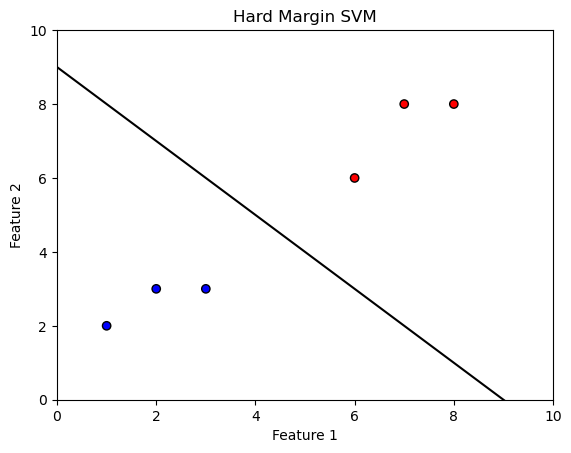

In [62]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()

# Soft Margin Classifier

### Q4. Soft Margin Classifier란?

자신이 속하는 클래스의 마진 밖으로 넘어가거나 상대방 클래스의 마진 평면 너머로 넘어간 데이터들도 허용하는 서포트 벡터 머신

### Q5. Soft Margin의 정의를 떠올리며, 노이즈가 추가된 데이터셋을 생성해주세요. (2개 이상 추가 생성 필요)

In [77]:
# 데이터셋 생성 (약간의 노이즈 추가)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [6, 4], [4, 4]])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1])

In [78]:
# Soft Margin SVM 모델 학습
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(kernel='linear')

### Q6. 마진을 산출해 시각화하고, Support Vector을 찾아주세요.

하단 그림은 예시로, 꼭 똑같이 출력되지 않아도 됩니다.

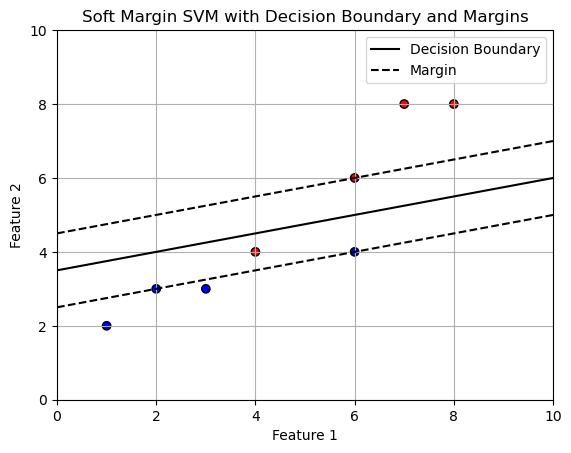

In [79]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# 마진 경계 계산
margin =  1 / np.sqrt(np.sum(model.coef_**2))
y_margin_positive = y_plot + np.sqrt(1 + (-w[0]/w[1])**2) * margin
y_margin_negative = y_plot - np.sqrt(1 + (-w[0]/w[1])**2) * margin

# 마진 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

# 프로젝트 (SVC)

In [80]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### Linear SVC

In [81]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [82]:
y_pred = clf.predict(X) # 학습 데이터의 재예측 (실습용)
confusion_matrix(y, y_pred) # 따라서, 분류 결과가 상당히 정확할 수밖에 없음을 감안해야 함

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

### Q7. 위 예시처럼, 옵션을 linear로 설정해도 되지만, sklearn의 LinearSVC 함수를 사용해도 구현할 수 있습니다. LinearSVC로 재구현해주세요.

In [83]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(C=C)
lin_clf.fit(X,y)

LinearSVC(C=1)

In [84]:
y_pred = lin_clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

### Kernal SVC

### Q8. Kernel SVC - non-linear한 형태의 SVM을 하나 이상 구현해주세요. 동일하게, 학습데이터를 predict하여 confusion matrix를 구해주세요.

In [86]:
kernel_svc = SVC(C=C, kernel='rbf')
kernel_svc.fit(X,y)
y_pred = kernel_svc.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

In [87]:
poly_svc = SVC(C=C, kernel='poly', degree=3)
poly_svc.fit(X,y)
y_pred = poly_svc.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]])

### 시각화

### Q9. 아래 예시 plot처럼, linear model과 non-linear 모델의 시각화 결과를 출력해주세요.

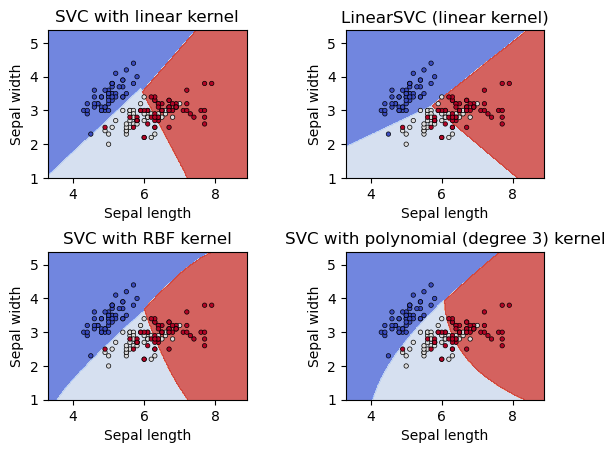

In [101]:
h = .02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

for i, model in enumerate((clf, lin_clf, kernel_svc, poly_svc)):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # ravel() = flattening 함수
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=10, linewidths=0.5, edgecolors='black')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])

plt.show()

### 수고하셨습니다.